# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [14]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.unique(y_train)) | set(np.unique(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [15]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib as mpl
# Visualizations will be shown in the notebook.
%matplotlib inline

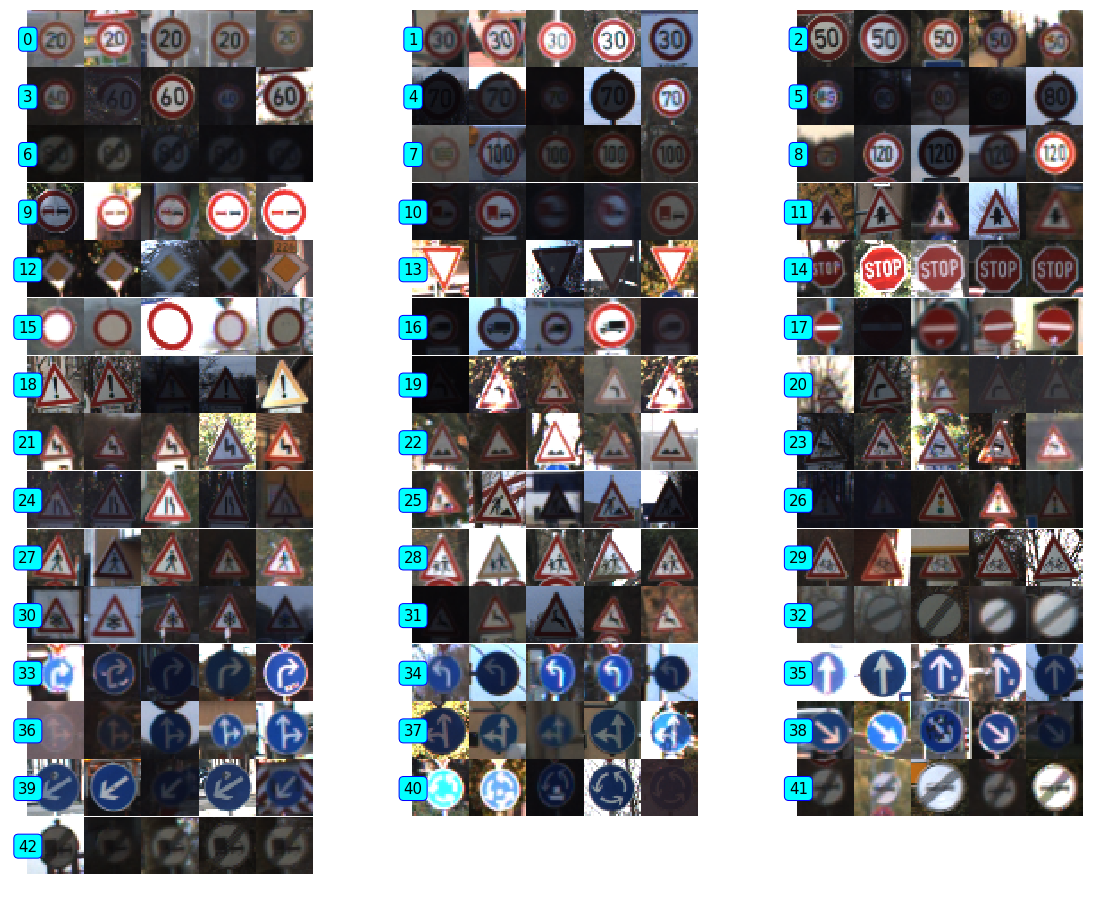

In [16]:
def show_samples(inputs, labels, samples_per_class=5, figsize=(20, 15), **kwargs):
    """
    Show `samples_per_class` samples for each class in the given inputs
    """
    img_shape = inputs.shape[1:]
    img_width = img_shape[1]
    all_classes = np.unique(labels).tolist()
    
    plt.figure(figsize=figsize)
    gs = mpl.gridspec.GridSpec((len(all_classes) // 3) + 1, 3)
    gs.update(wspace=0.01, hspace=0.01, left=0.1, right=0.9, bottom=0.1, top=0.9)
    
    for cls_idx, cls in enumerate(all_classes):
        samples = inputs[labels == cls, :]
        idx = np.random.choice(samples.shape[0], samples_per_class, replace=False)
        samples = samples[idx, :]
        img = np.zeros((img_shape[0], samples.shape[0] * img_width, img_shape[2]), samples.dtype)
        for s in range(samples.shape[0]):
            img[:, (img_width * s):(img_width * (s+1)), :] = samples[s, :]
        
        plt.subplot(gs[cls_idx])
        plt.imshow(img, **kwargs)
        plt.axis('off')
        t = plt.text(0, img.shape[0] / 2, '{:d}'.format(cls), ha="center", va="center",
                     size=15, bbox=dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=1))
        
show_samples(X_train, y_train)

In [17]:
# Data distribution
def plot_label_distribution(labels, title=''):
    all_labels = np.unique(labels).tolist()
    y_label_counts = [np.sum(labels == i) for i in sorted(all_labels)]
    plt.figure(figsize=(20, 5))
    plt.bar(all_labels, y_label_counts)
    plt.xticks(all_labels)
    plt.title(title)

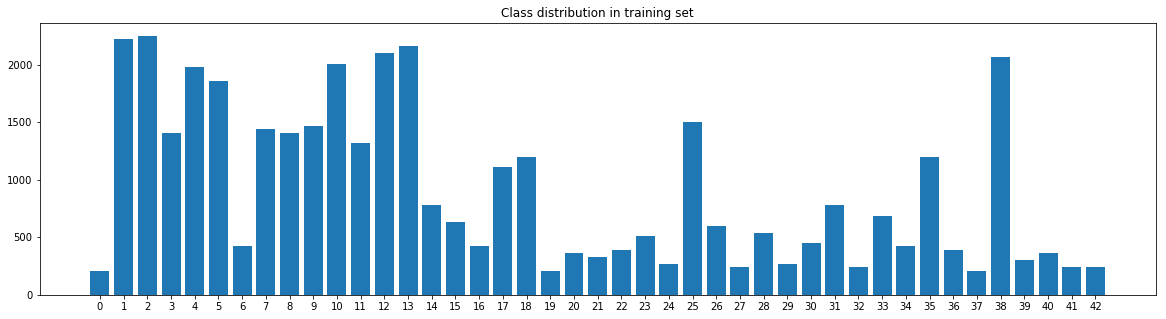

In [18]:
plot_label_distribution(y_train, 'Class distribution in training set')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
# Contrast stretching
# This will convert the images to the [0, 1] range

from skimage import exposure
from skimage import color

def contrast_stretch(img):
    p2, p98 = np.percentile(img, (2, 98))
    return exposure.rescale_intensity(img, in_range=(p2, p98))
    # return exposure.equalize_hist(img)

for i in range(X_train.shape[0]):
    X_train[i, :, :, :] = contrast_stretch(X_train[i, :, :, :])
for i in range(X_test.shape[0]):
    X_test[i, :, :, :] = contrast_stretch(X_test[i, :, :, :])

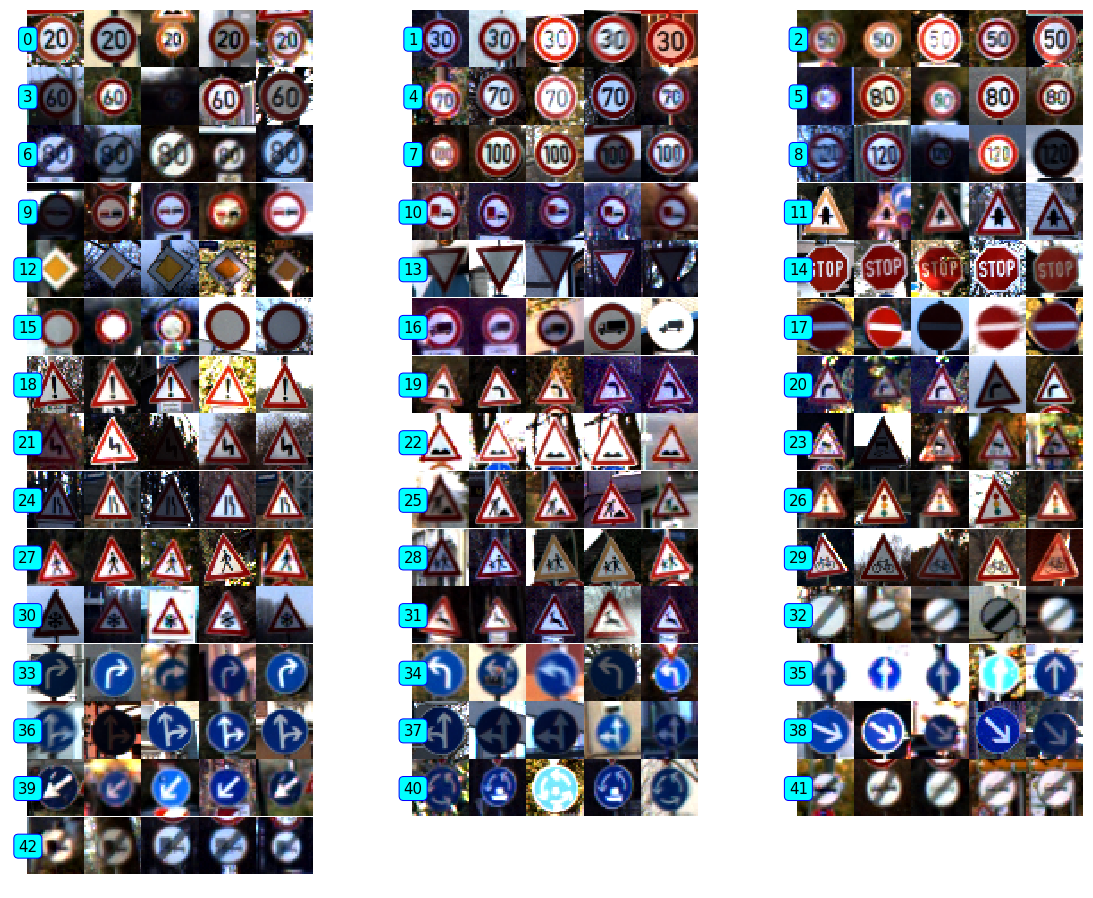

In [20]:
show_samples(X_train, y_train)

In [21]:
# Data augmentation

from skimage import transform

def fast_warp(img, tf, output_shape, mode='wrap'):
    return transform._warps_cy._warp_fast(img, tf.params,
                                          output_shape=output_shape, mode=mode)


def augment_img(img):
    # random rotations
    dorotate = np.random.randint(-10, 10)

    # random translations
    trans_1 = np.random.randint(-5, 5)
    trans_2 = np.random.randint(-5, 5)

    # random zooms
    zoom = np.random.uniform(1, 1.2)

    # have to shift to center and then shift back after transformation
    center_shift   = np.array((img.shape[0], img.shape[1])) / 2. - 0.5
    tform_center   = transform.SimilarityTransform(translation=-center_shift)
    tform_uncenter = transform.SimilarityTransform(translation=center_shift)

    tform_aug = transform.AffineTransform(rotation = np.deg2rad(dorotate),
                                          scale =(1/zoom, 1/zoom),
                                          #shear = np.deg2rad(shear_deg),
                                          translation = (trans_1, trans_2))

    tform = tform_center + tform_aug + tform_uncenter
    
    img2 = img.copy()
    for c in range(img2.shape[2]):
        img2[:, :, c] = fast_warp(img2[:, :, c], tform, output_shape=img2.shape[:2])
    return img2

generated_x_train = []
generated_y_train = []
AUGMENTATION_RATIO = 5
for cls in [0, 6, 16, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 34, 36, 37, 39, 40, 41, 42]:
    for idx in np.where(y_train == cls)[0]:
        for _ in range(AUGMENTATION_RATIO):
            generated_x_train.append(augment_img(X_train[idx, :, :, :]))
            generated_y_train.append(cls)

AUGMENTATION_RATIO = 3
for cls in [14, 15, 31, 33]:
    for idx in np.where(y_train == cls)[0]:
        for _ in range(AUGMENTATION_RATIO):
            generated_x_train.append(augment_img(X_train[idx, :, :, :]))
            generated_y_train.append(cls)

generated_x_train = np.asarray(generated_x_train)
generated_y_train = np.asarray(generated_y_train)
assert(generated_x_train.shape[0] == generated_y_train.shape[0])
print(generated_x_train.shape, generated_y_train.shape)


(46737, 32, 32, 3) (46737,)


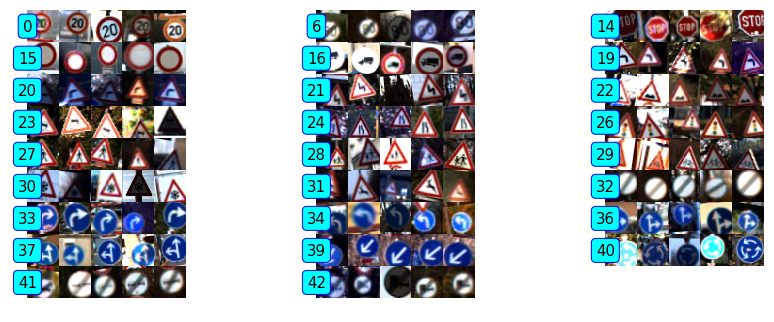

In [22]:
show_samples(generated_x_train, generated_y_train, figsize=(15, 5))

In [23]:
X_train = np.vstack((X_train, generated_x_train))
y_train = np.hstack((y_train, generated_y_train))
assert(X_train.shape[0] == y_train.shape[0])
print(X_train.shape, y_train.shape)

(85946, 32, 32, 3) (85946,)


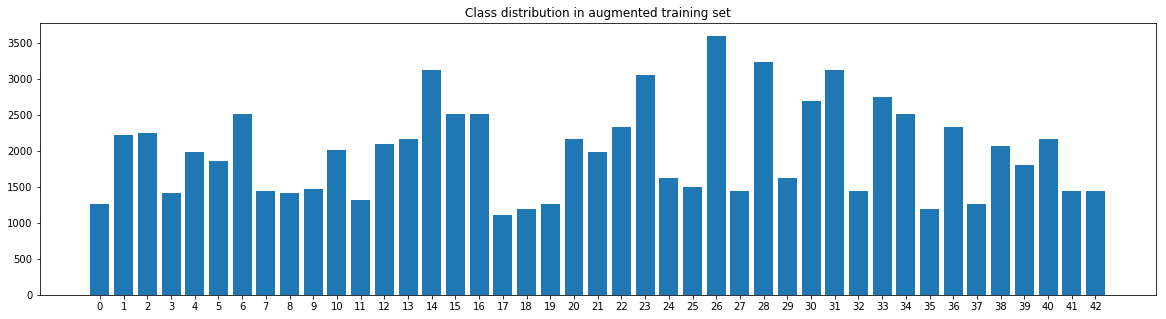

In [24]:
plot_label_distribution(y_train, 'Class distribution in augmented training set')

In [25]:
# Standardization. Save the mean and std of the training set.

#X_train = X_train / 255.
X_mean = X_train.mean(0)
X_std = X_train.std(0)
assert np.all(np.fabs(X_std) >= 1E-6)

X_train = (X_train - X_mean) / X_std
assert np.all(np.fabs(X_train.mean(0)) <= 1E-6)
assert np.all(np.fabs(X_train.std(0) - 1) <= 1E-6)

X_test = (X_test - X_mean) / X_std
print(np.fabs(X_test.mean(0)).max(), X_test.std(0).max())

0.337833110138 1.08398312474


In [26]:
# Save preprocessed data
with open('./traffic-signs-data/train.processed.p', mode='wb') as f:
    pickle.dump({'train': X_train, 'test': X_test, 'mean': X_mean, 'std': X_std}, f)

In [27]:
# reload data
with open('./traffic-signs-data/train.processed.p', mode='rb') as f:
    data = pickle.load(f)
    X_train = data['train']
    X_test = data['test']
    
print(X_train.shape, X_test.shape)

(77309, 32, 32, 3) (12630, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- **Contrast stretching**: input images have different lighting conditions, some too dark, some too light. Contrast stretching help balance this.
    
    I could've used Histogram Equalization too, but the images look a bit unnatural after Histogram equalization, so I ended up using Contrast Stretching, although some images ended up with weird color tone after Contrast Stretching.
    
    Since both methods do not have significant parameters to tune, we can use them for both training and test sets.
    
    Eventually, Contrast Stretching helps improve the generalization score by ~2%.
    
- Standardize the input data to zero-mean, unit-variance. This is to help gradient descent works better.

In [27]:
from sklearn.utils import shuffle

np.random.seed(42)

X_trainset = X_train.copy()
X_trainset, y_trainset = shuffle(X_trainset, y_train)

n_train = int(round(X_trainset.shape[0] * 0.8))
X_valset = X_trainset[n_train:, :]
y_valset = y_trainset[n_train:]
X_trainset = X_trainset[:n_train, :]
y_trainset = y_trainset[:n_train]

print(X_trainset.shape, X_valset.shape)
print(y_trainset.shape, y_valset.shape)
assert(X_trainset.shape[0] + X_valset.shape[0] == X_train.shape[0])

(68757, 32, 32, 3) (17189, 32, 32, 3)
(68757,) (17189,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- **Data augmentation**: randomly applying rotation, translation and zoom to the minority classes in the training set. This alone improved the generalization by ~3%.

    The difference from the original dataset is the new training set has the minority classes augmented 5 times by various image transformation techniques.

- The new training set (original training set + augmented set) is splited randomly into training and validation set with a ratio of 80% for training and 20% for testing.
- The original test set is kept untouched (except that they also get pre-processed by contrast stretching and standardization)

In [28]:
import tensorflow as tf

tf.reset_default_graph()

def define_network(inputs, keep_prob):
    # 32 x 32 x 3
    conv1 = tf.contrib.layers.convolution2d(inputs, 
                                           num_outputs=128, kernel_size=[3, 3], stride=[1, 1], padding='VALID', 
                                           rate=1, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    conv1_pool = tf.contrib.layers.max_pool2d(conv1, kernel_size=[2, 2], stride=[2, 2], padding='VALID')

    # 15 x 15 x C
    conv2 = tf.contrib.layers.convolution2d(conv1_pool, 
                                           num_outputs=256, kernel_size=[3, 3], stride=[2, 2], padding='VALID', 
                                           rate=1, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    conv2 = tf.contrib.layers.max_pool2d(conv2, kernel_size=[2, 2], stride=[1, 1], padding='VALID')

    # 6 x 6 x C
    conv3 = tf.contrib.layers.convolution2d(conv2, 
                                           num_outputs=1024, kernel_size=[4, 4], stride=[2, 2], padding='VALID', 
                                           rate=1, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    conv3 = tf.contrib.layers.max_pool2d(conv3, kernel_size=[2, 2], stride=[1, 1], padding='VALID')

    # 1 x 1 x C
    ff0 = tf.reshape(conv3, [-1, 1024]) 
    
    ff1 = tf.contrib.layers.fully_connected(ff0,
                                           num_outputs=1024, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    ff1 = tf.nn.dropout(ff1, keep_prob)
    
    ff2 = tf.contrib.layers.fully_connected(ff1,
                                           num_outputs=1024, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    ff2 = tf.nn.dropout(ff2, keep_prob)
    
    ff3 = tf.contrib.layers.fully_connected(ff2,
                                           num_outputs=1024, activation_fn=tf.nn.relu,
                                           weights_initializer=tf.contrib.layers.xavier_initializer(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    ff3 = tf.nn.dropout(ff3, keep_prob)
    
    logits = tf.contrib.layers.fully_connected(ff3,
                                           num_outputs=n_classes, activation_fn=None,
                                           weights_initializer=tf.contrib.layers.xavier_initializer(uniform=True),
                                           biases_initializer=tf.constant_initializer(value=0.0))
    return logits, conv1


inputs = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]))
labels = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(labels, n_classes)
keep_prob = tf.placeholder(tf.float32)

logits, conv1 = define_network(inputs, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_labels)
loss_operation = tf.reduce_mean(cross_entropy)

# optimization
BATCH_SIZE = 128
steps_per_epoch = X_trainset.shape[0] / BATCH_SIZE
decay_steps = int(round(3 * steps_per_epoch))

print('Decaying learning rate with decay_steps = {}'.format(decay_steps))

global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.01
momentum = 0.9
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, decay_steps, 0.75, staircase=True)

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

# optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
# training_operation = optimizer.minimize(loss_operation)

# optimizer = tf.train.AdagradOptimizer(learning_rate = 0.01, initial_accumulator_value=0.1)
# training_operation = optimizer.minimize(loss_operation)

Decaying learning rate with decay_steps = 1611


In [29]:
softmax_op = tf.nn.softmax(logits)
prediction_op = tf.argmax(softmax_op, 1)
top_k_op = tf.nn.top_k(softmax_op, k=5)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, sess, batch_size=128):
    num_examples = len(X_data)
    total_accuracy = 0
    avg_loss = 0
    batches = 0
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], 
                                  feed_dict={inputs: batch_x, labels: batch_y,
                                            keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        avg_loss += loss
        batches += 1
    return total_accuracy / num_examples, avg_loss / batches

tf.summary.image('input', inputs, 10)
tf.summary.scalar('cross_entropy', loss_operation)
tf.summary.scalar('accuracy', accuracy_operation)
tf.summary.tensor_summary('logits', logits)
merged_summary = tf.summary.merge_all()
train_summary = tf.summary.FileWriter('./model/summary/train')

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

- **Please discuss how did you tell a convolutional layer is well suited for this problem**
  
  This is a standard image classification problem, so the natural candidate is a Convolutional net. 
  
  The feature maps in the convolutional layers learn shared features among different regions in the image. This weight sharing mechanism makes the model to be more parameter-efficient, with the intuition that nearby pixels in the receptive field should share the same local "properties" which can be applied across the whole receptive field.
  
  Multiple filters are used to make sure the model learns to capture various kinds of "local properties" in the receptive field.
  
  A few fully-connected layers are added on the top of the network to make sure it has enough parameter to fit the training set. In fact, those are the layers that carry most of the parameters in the model.
  
  By intuition, we want each unit in the highest convolutional layer to have the receptive field that cover the whole input image (i.e. it outputs an image of size 1x1). This is why I came up with the sizes and strides for the convolutional and max-pooling layers as below:
  
    - Convolutional: 128 filter maps of size 3x3 with stride 1x1
    - Max-pooling: 2x2 with stride 2x2
    - Convolutional: 256 filter maps of size 3x3 with stride 2x2
    - Max-pooling: 2x2 with stride 1x1
    - Convolutional: 1024 filter maps of size 4x4 with stride 2x2
    - Max-pooling: 2x2 with stride 1x1
    - 3 fully connected layers with dropout ratio = 0.5
    - Softmax

  I could've also used other architectures like ResNet or Inception, but then we might need more training data for those.
  
- **Please discuss how did you choose the particular activation**
  I didn't try any other activation function other than ReLU. It has been known that ReLU is better for deep nets than sigmoid or tanh (because the gradient of ReLU is not exploded/vanished in the backward phase of backprop), so I didn't try those. I also didn't have enough time to try other exotic variants like PReLU or ELU.
  
  I initialize the weights with Xavier because it's a standard technique in the field (thought to be better than Gaussian initialization). The biases are initialized to zeros, although we might initialize the bias of the softmax layer to be the distribution of classes in the training set.

In [30]:
### Train your model here.
### Feel free to use as many code cells as needed.

sess = tf.Session()
tf.set_random_seed(42)
stats = []

sess.run(tf.global_variables_initializer())
train_summary.add_graph(sess.graph)
n_train = X_trainset.shape[0]
best_val_acc = 0
best_epoch = -1

for i in range(40):
    X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
    batches = 0
    train_acc = 0
    train_loss = 0

    for offset in range(0, X_trainset.shape[0], BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
        summary, loss, accuracy, lr, _ = sess.run([merged_summary, loss_operation, 
                                               accuracy_operation, learning_rate, training_operation], 
                                              feed_dict={inputs: batch_x, labels: batch_y, keep_prob: 0.5})
        train_acc += (accuracy * len(batch_x)) / n_train
        train_loss += (loss * len(batch_x)) / n_train
        train_summary.add_summary(summary, i)

    val_acc, val_loss = evaluate(X_valset, y_valset, sess, batch_size=BATCH_SIZE)
    print("Epoch {}: Traing loss={:.4f}, acc={:.4f}; Val loss={:.4f}, acc={:.4f}, lr={:.4f}".format(
        i, train_loss, train_acc, val_loss, val_acc, lr))
    stats.append([i, train_loss, train_acc, val_loss, val_acc, lr])

    if best_val_acc < val_acc:
        best_val_acc = val_acc
        best_epoch = i
        saver.save(sess, './model/traffic_sign', global_step=i)
        print('Saved model at epoch {}'.format(i))
print('Done')

Epoch 0: Traing loss=2.8607, acc=0.1834; Val loss=1.3864, acc=0.5159, lr=0.0100
Saved model at epoch 0
Epoch 1: Traing loss=0.7773, acc=0.7348; Val loss=0.1827, acc=0.9438, lr=0.0100
Saved model at epoch 1
Epoch 2: Traing loss=0.1993, acc=0.9363; Val loss=0.0730, acc=0.9777, lr=0.0075
Saved model at epoch 2
Epoch 3: Traing loss=0.0789, acc=0.9753; Val loss=0.0471, acc=0.9856, lr=0.0075
Saved model at epoch 3
Epoch 4: Traing loss=0.0498, acc=0.9846; Val loss=0.0312, acc=0.9907, lr=0.0075
Saved model at epoch 4
Epoch 5: Traing loss=0.0352, acc=0.9893; Val loss=0.0240, acc=0.9932, lr=0.0056
Saved model at epoch 5
Epoch 6: Traing loss=0.0200, acc=0.9943; Val loss=0.0183, acc=0.9951, lr=0.0056
Saved model at epoch 6
Epoch 7: Traing loss=0.0137, acc=0.9960; Val loss=0.0141, acc=0.9959, lr=0.0056
Saved model at epoch 7
Epoch 8: Traing loss=0.0102, acc=0.9972; Val loss=0.0143, acc=0.9955, lr=0.0042
Epoch 9: Traing loss=0.0072, acc=0.9979; Val loss=0.0128, acc=0.9963, lr=0.0042
Saved model at e

### Learning curves

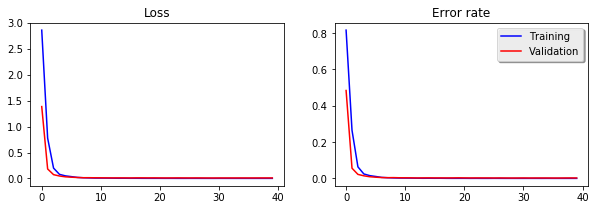

In [31]:
stats = np.asarray(stats)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(10, 3))
ax1.set_title('Loss')
ax1.plot(stats[:, 0], stats[:, 1], 'b', stats[:, 0], stats[:, 3], 'r')
ax2.set_title('Error rate')
ax2.plot(stats[:, 0], 1.0 - stats[:, 2], 'b', label='Training')
ax2.plot(stats[:, 0], 1.0 - stats[:, 4], 'r', label='Validation')
ax2.legend(loc='upper right', shadow=True)

In [ ]:
!python3 -m tensorflow.tensorboard --logdir=./model/summary/train/

### Visualize the first convolutional layer

Filters in the first layers mostly learn to recognize the edges, but some focus on the shape of the signs, some on the content (numbers, etc...) inside the sign.

(1, 30, 30, 128)


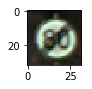

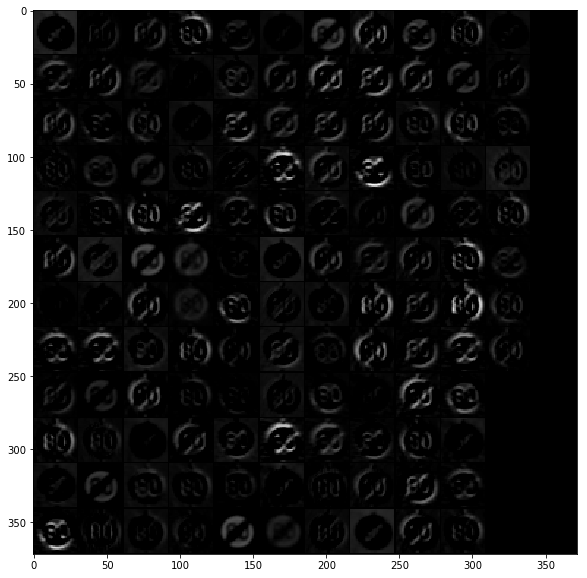

In [69]:
# conv1_var = [x for x in tf.trainable_variables() if x.name == 'Conv/weights:0'][0]
img_inspect = X_train[10101, :, :, :]
conv1_val = sess.run(conv1, feed_dict={inputs: [img_inspect], labels: np.zeros((1)), 
                                           keep_prob: 1})
print(conv1_val.shape)
assert(conv1_val.shape == (1, 30, 30, 128))
conv1_val = conv1_val[0, :, :, :]

sz =conv1_val.shape[0] + 1
n_filters = conv1_val.shape[-1]
grid_size = (12, 12)
filters_img = np.zeros((grid_size[0] * sz, grid_size[1] * sz))
for i in range(n_filters):
    x = i // grid_size[0]
    y = i % grid_size[0]
    filters_img[sz*y:(sz*y + sz - 1), sz*x:(sz*x + sz - 1)] = conv1_val[:, :, i]

img_inspect = (img_inspect - img_inspect.min()) / (img_inspect.max() - img_inspect.min())
plt.figure(figsize=(1, 1))
plt.imshow(img_inspect)
plt.figure(figsize=(10, 10))
plt.imshow(filters_img, cmap='gray')

### Reload the model

In [26]:
best_epoch = 28
sess = tf.Session()
saver.restore(sess, './model/traffic_sign-{}'.format(best_epoch))

### Accuracy on the test set

In [70]:
test_acc, test_loss = evaluate(X_test, y_test, sess, batch_size=BATCH_SIZE)
print('Test loss = {:.4f}, accuracy = {:.4f}'.format(test_loss, test_acc))

Test loss = 0.3571, accuracy = 0.9445


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- **Please discuss how did you choose the optimzer.**

  SGD with initial learning rate = 0.01, momentum = 0.9, decaying learning rate after every 3 epochs with decaying rate = 0.75.

  Since I use high momentum of 0.9 (which is apparently the value used by the author of momentum), I can set the initial learning rate to be relatively high, which make training progress pretty fast in the first several epochs.
  
  After the first few epochs, it is a good idea to reduce learning rate to get to the lower points in the objective function. The value that I used (3 epochs and 0.75) are mostly chosen by observing the learning curves. After the first 3 epochs I saw learning starts to converge, so that's why I use 3 epochs. Initially I used decaying learning rate of 0.9, but I soon realized it was too conservative (accuracy doesn't improve quickly enough after the first 3 epochs), so I reduced it to 0.75. I could've further reduced it to 0.5, but that might make learning a bit too slow. 
  
  Anyway, I trained for 40 epochs to make sure the model reachs a point where the learning rate is small enough to capture the local minima it was falling into.

  I tried Adam and Adagrad but they are sometimes unstable for some configurations. Momentum always gave stable results.

- **Batch size** = 128. I didn't try any other value, this is the default for most of my experiments on most datasets.
- **Epochs** = 40, the best model on validation set is recorded.
- **Optimizes** the cross entropy loss.

- **Please discuss how did you tune the hyperparameter.**

  All other hyperparameters are already discussed, except dropout. After data augmentation, I wanted to increase the model size, so I doubled the size of almost all the layers. Based on my experience, I added dropout to prevent it from overfitting.
  
  After adding dropout, the model converges pretty nicely, where the training error decreases almost at the same speed at the validation error, so there is no evidence to believe the model is overfitting. That's why I didn't use any other regularization techniques like L2 or applying dropout to the input image.
  
  Since the model is doing a bit "too well" on both training and validation set, one way to improve the generalization is to collect or generate more data.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

- My first attempt gives around 88% accuracy on the test set.
- With contrast stretching, it gets 91% accuracy.
- With data augmentation, increasing the number of convolutional layers (from 16 to 64, etc..), increasing the size of fully-connected layers, adding dropout, it gets 94% of accuracy.
- Convert from RGB to HSV/YUV didn't help a lot.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [33]:
with open('new-signs.p', 'rb') as f:
    new_data = pickle.load(f)
assert new_data.shape == (7, 32, 32, 3)

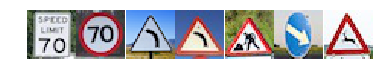

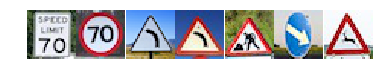

In [34]:
def plot_new_images(_data):
    gs = mpl.gridspec.GridSpec(1, _data.shape[0])
    gs.update(wspace=0.01, hspace=0.01, left=0.1, right=0.9, bottom=0.1, top=0.9)

    for i in range(_data.shape[0]):
        plt.subplot(gs[i])
        img = _data[i, :, :, :]
        plt.imshow(img)
        plt.axis('off')
    
new_labels = np.asarray([4, 4, 19, 19, 25, 38, 31])

plot_new_images(new_data / 255.)
for i in range(new_data.shape[0]):
    new_data[i, :, :, :] = contrast_stretch(new_data[i, :, :, :])

plt.figure()
plot_new_images(new_data)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- The seven new images belong to classes 4, 4, 19, 19, 25, 38, 31  (Speed limit 70km/h, Dangerous curve to the left, Road work, Keep right, Wild animals crossing)
- The first and the third photos are not in the same style with the dataset

In [71]:
preds, preds_top_k = sess.run([prediction_op, top_k_op], 
                              feed_dict={inputs: new_data, 
                                         labels: np.zeros((new_data.shape[0], 1), np.int32),
                                         keep_prob: 1.0})

In [72]:
import pandas as pd
label_names = pd.read_csv('signnames.csv')
label_names = label_names.SignName
for i in range(len(preds)):
    print('Image {}: pred={}: {}, truth={}: {}'.format(i, preds[i], label_names[preds[i]], 
                                                       new_labels[i], label_names[new_labels[i]]))
print('Accuracy: {:.3f}'.format(np.sum(np.asarray(preds) == new_labels) / len(preds)))

Image 0: pred=1: Speed limit (30km/h), truth=4: Speed limit (70km/h)
Image 1: pred=4: Speed limit (70km/h), truth=4: Speed limit (70km/h)
Image 2: pred=19: Dangerous curve to the left, truth=19: Dangerous curve to the left
Image 3: pred=19: Dangerous curve to the left, truth=19: Dangerous curve to the left
Image 4: pred=23: Slippery road, truth=25: Road work
Image 5: pred=38: Keep right, truth=38: Keep right
Image 6: pred=31: Wild animals crossing, truth=31: Wild animals crossing
Accuracy: 0.714


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

- The model got 5 out of 7 cases correctly (71.4% accurate), this is a bit off compared to the test set and validation set
- The model failed on image 0 and image 4.
- Suprisingly, image 2 is predicted correctly.
- Equally suprising, image 4 is predicted incorrectly.

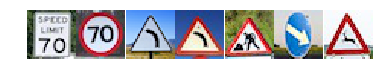

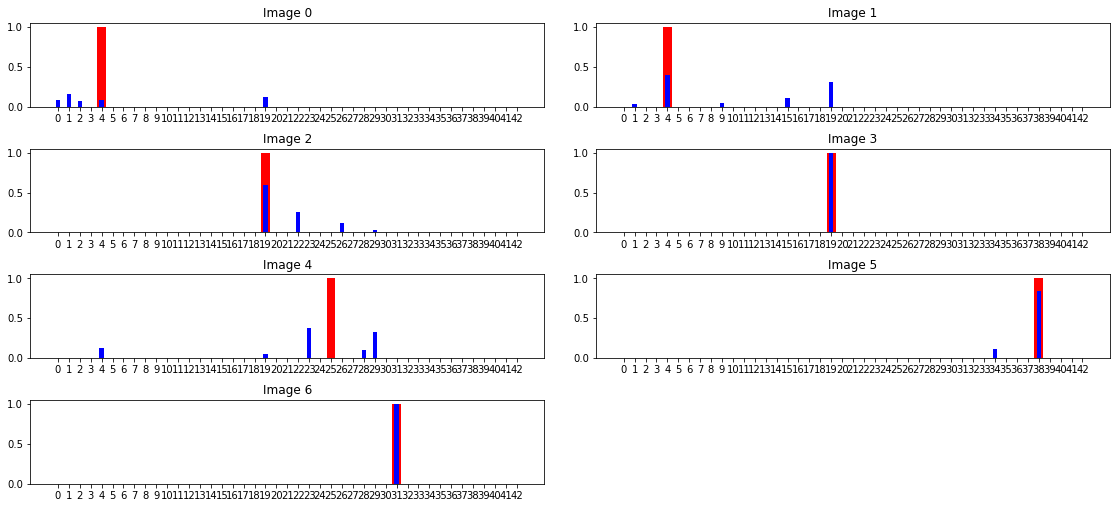

In [73]:
def visualize_top_k(indices, values, correct_class, title):
    all_labels = range(43)
    vals = np.zeros((43))
    vals[correct_class] = 1
    plt.bar(all_labels, vals, fc='r', label='Truth')
    vals = np.zeros((43))
    for i, v in zip(indices, values):
        vals[i] = v
    plt.bar(all_labels, vals, fc='b', width=0.4, label='Predicted')
    plt.xticks(all_labels)
    plt.title(title)

gs = mpl.gridspec.GridSpec(1 + (preds_top_k.values.shape[0] // 2), 2)
gs.update(wspace=0.1, hspace=0.5, left=0, right=1, bottom=0.1, top=0.9)

plot_new_images(new_data)
plt.figure(figsize=(15, 8))

for i in range(preds_top_k.values.shape[0]):
    plt.subplot(gs[i])
    visualize_top_k(preds_top_k.indices[i, :], preds_top_k.values[i, :], new_labels[i], 'Image {}'.format(i))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

- The model is very certain for Image 3, 5 and 6, which are correctly classified.
- It is fairly confident on Image 1 and Image 2 (left turn)
- It is totally off on Image 4, where it mistakes class 25 (Road work) for 23 (Slippery road) and 29 (Bicycles crossing), probably becase the drawing is flipped horizontally compared to those in the training set. We should've covered this if we augment class 25 by flipping images horizontally.
- For Image 0, the model got it wrong, but the correct class still in the top 5, and the model is equally uncertain about all the top 5 classes.
- So the top-5 accuracy is 6/7 (85.7%)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.